# 11.1 Clustering

# 11.2 Clustering Algorithms

## 11.2.1 K-Means clustering

In [ ]:
# WCSS : Within Cluster Sum of Squares
# elbow graph를 활용하여 적절한 k값을 찾는다

In [3]:
# 라이브러리 호출

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import cv2
import os, glob, shutil

In [4]:
# GPU 설정

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        print(e)

Metal device set to: Apple M1
1 Physical GPUs 1 Logical GPUs

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-05-21 13:03:53.623410: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-21 13:03:53.623719: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [5]:
# 데이터셋 준비

input_dir = 'data/chap11/pets'
glob_dir = input_dir + '/*.jpg'

images = [cv2.resize(cv2.imread(file), (224,224)) for file in glob.glob(glob_dir)]
paths = [file for file in glob.glob(glob_dir)]
images = np.array(np.float32(images).reshape(len(images),-1)/255)

In [6]:
# Feature Extraction

model = tf.keras.applications.MobileNetV2(include_top=False, weights='imagenet', input_shape=(224,224,3))
predictions = model.predict(images.reshape(-1,224,224,3))
pred_images = predictions.reshape(images.shape[0], -1)

9420800/9406464 [==============================] - 1s 0us/step


2022-05-21 13:07:15.453890: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-05-21 13:07:15.603635: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [9]:
# 클러스터링 구성

k = 2
kmodel = KMeans(n_clusters=k, random_state=728)
kmodel.fit(pred_images)
kpredictions = kmodel.predict(pred_images)
shutil.rmtree('data/chap11/output')
for i in range(k):
    os.makedirs('data/chap11/output' + str(i))
for i in range(len(paths)):
    shutil.copy2(paths[i], 'data/chap11/output' + str(kpredictions[i]))

In [10]:
# KMeans에서 클래스 개수 알아보기

sil = []
kl = []
kmax = 10
for k in range(2, kmax+1):
    kmeans2 = KMeans(n_clusters=k).fit(pred_images)
    labels = kmeans2.labels_
    sil.append(silhouette_score(pred_images, labels, metric='euclidean'))
    kl.append(k)

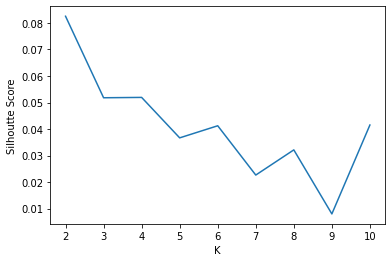

In [11]:
# 실루엣의 시각화

plt.plot(kl, sil)
plt.xlabel('K')
plt.ylabel('Silhoutte Score')
plt.show()

In [ ]:
# 가장 큰 값의 Silhoutte Score를 가지는 K값을 선택

In [12]:
# 라이브러리 호출 및 데이터 로딩

import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
X_train = np.load('data/chap11/data.npy')

[[3.04641134 3.10654272]
 [1.60718016 1.35251723]]


[[[ 0.83656079  0.37865596]
  [ 0.37865596  0.72727426]]

 [[ 0.74995307 -0.5010097 ]
  [-0.5010097   0.74377694]]]


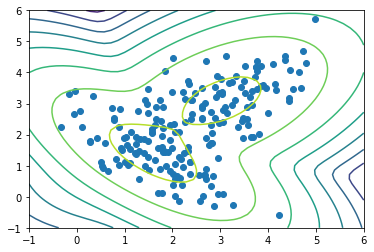

In [14]:
# GMM 생성

gmm = GaussianMixture(n_components=2)
gmm.fit(X_train)

print(gmm.means_)
print('\n')
print(gmm.covariances_)

X, Y = np.meshgrid(np.linspace(-1,6), np.linspace(-1,6))
XX = np.array([X.ravel(), Y.ravel()]).T
Z = gmm.score_samples(XX)
Z = Z.reshape((50,50))

plt.contour(X, Y, Z)
plt.scatter(X_train[:,0], X_train[:,1])
plt.show()

In [15]:
!pip install MiniSom

  Preparing metadata (setup.py) ... done
  Created wheel for MiniSom: filename=MiniSom-2.3.0-py3-none-any.whl size=9002 sha256=7e23ab2cb379d1e6ce1e96950cb181144a3eaab15473100803534a326f3cfc44
  Stored in directory: /Users/mini/Library/Caches/pip/wheels/6d/4e/9e/a95c14a232a196c22d9c04b221ff5d25461a1a4c55339c61db
Successfully built MiniSom


In [16]:
# 라이브러리 호출 및 데이터셋 내려받기

import numpy as np
from sklearn.datasets import load_digits
from minisom import MiniSom
from pylab import plot, axis, show, pcolor, colorbar, bone

digits = load_digits()
data = digits.data
labels = digits.target

SOM 초기화

 SOM 진행 종료


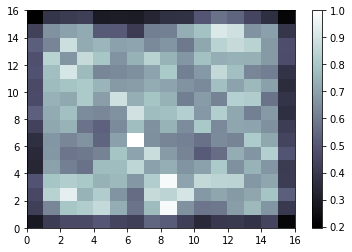

In [17]:
# 훈련 데이터셋을 MiniSom 알고리즘에 적용

som = MiniSom(16, 16, 64, sigma=1.0, learning_rate=0.5)
som.random_weights_init(data)
print("SOM 초기화")
som.train_random(data, 10000)
print("\n SOM 진행 종료")

bone()
pcolor(som.distance_map().T)
colorbar()

/var/folders/lt/7j3txvvn1bgc84pp3c9kldcw0000gn/T/ipykernel_1723/1034917569.py:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  labels[labels=='0'] = 0
/var/folders/lt/7j3txvvn1bgc84pp3c9kldcw0000gn/T/ipykernel_1723/1034917569.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  labels[labels=='1'] = 1
/var/folders/lt/7j3txvvn1bgc84pp3c9kldcw0000gn/T/ipykernel_1723/1034917569.py:5: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  labels[labels=='2'] = 2
/var/folders/lt/7j3txvvn1bgc84pp3c9kldcw0000gn/T/ipykernel_1723/1034917569.py:6: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  labels[labels=='3'] = 3
/var/folders/lt/7j3txvvn1bgc84pp3c9kldcw0000gn/T/ipykernel_1723/1034

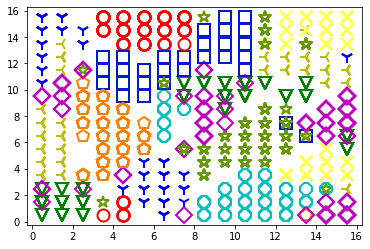

In [20]:
# 클래스에 대해 레이블 설정 및 색상 할당

labels[labels=='0'] = 0
labels[labels=='1'] = 1
labels[labels=='2'] = 2
labels[labels=='3'] = 3
labels[labels=='4'] = 4
labels[labels=='5'] = 5
labels[labels=='6'] = 6
labels[labels=='7'] = 7
labels[labels=='8'] = 8
labels[labels=='9'] = 9

markers = ['o', 'v', '1', '3', '8', 's', 'p', 'x', 'D', '*']
colors = ['r', 'g', 'b', 'y', 'c', (0,0.1,0.8), (1,0.5,0), (1,1,0.3), 'm', (0.4,0.6,0)]
for cnt, xx in enumerate(data):
    w = som.winner(xx)
    plot(w[0]+.5, w[1]+.5, markers[labels[cnt]], markerfacecolor='None', markeredgecolor=colors[labels[cnt]], markersize=12, markeredgewidth=2)

show()